In [2]:
import pandas as pd
import os
import math
import nltk
import pickle
import json
from nltk.corpus import stopwords

from nltk.stem.snowball import SnowballStemmer
from collections import defaultdict
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt

In [3]:
#Load docs, queries and the inverted index
with open("Output/preprocessed_docs","rb") as file:
    docs = pickle.load(file)

with open("Output/preprocessed_queries","rb") as file:
    queries = pickle.load(file)

with open("Output/inverted_index","r") as file:
    inverted_index = json.load(file)


In [4]:
def query_weights1(tf,idf,term):
    return (0.5 + (0.5*tf[term])/tf[max(tf)]) * idf

In [5]:
def document_weights1(tf,idf,term):
    return tf*idf

In [20]:
def vector_space(query,docs, query_weight_func, doc_weight_func):

        tf={}
        
        for term in set(query):#Get query term frequency
                tf[term] = query.count(term)

        #Calculate query and doc weights
        query_weights = []
        document_weights = {}

        for doc in docs:
                document_weights[doc[0]] = []
        
        for term in set(query):

               # if  len(inverted_index[term]):
                if term in inverted_index and len(inverted_index[term]):
                        
                        idf = math.log(len(docs)/len(inverted_index[term]))

                        query_weights.append(query_weight_func(tf,idf,term))

                        for doc in docs:

                                try:
                                        tf_doc = inverted_index[term][doc[0]]
                                except:
                                        tf_doc = 0

                                w = doc_weight_func(tf_doc,idf,term)
                                document_weights[doc[0]].append(w)   

       
        #Calcualte cosine similarity for each doc
        sim = {}
        for doc in document_weights:
                sim[doc] = cosine_similarity([query_weights],[document_weights[doc]])

        return sorted(sim.items(), key=lambda x:x[1])[-7:]

In [31]:
#vector_space(queries[0],docs,query_weights1,document_weights1)
result_docs = []

# Iterate over queries using enumerate to get both index and query
for i, query in enumerate(queries):
    # Call the vector_space function and get the result
    result = vector_space(query, docs, query_weights1, document_weights1)
    
    # Extract the second element of each tuple in the result and convert it to a list
    elements = [int(item[0]) for item in result]
    
    # Add the iteration number and the list of second elements to the result_dict
   # result_docs[i+1] = elements
    result_docs.append(elements)

# Printing the result_dict
print(result_docs[10])




[649, 909, 330, 991, 596, 796, 798]


In [30]:

# Reading the queries
data = pd.read_csv('Relevant_20', header=None)

# Parse the data and create a dictionary
#relevant={}
relevant = []
for i, line in enumerate(data[0]):  # Assuming the queries are in the first column
   # query_number = i+1
    #relevant_docs = list(map(int, line.split()))
   # relevant[query_number] = relevant_docs
   relevant_docs = list(map(int, line.split()))
   relevant.append(relevant_docs)

print(relevant[10])


[36, 46, 96, 186, 301, 428, 518, 649, 652, 659, 772, 796, 798, 799, 835, 837, 908, 909, 991, 1119, 1178, 1226]


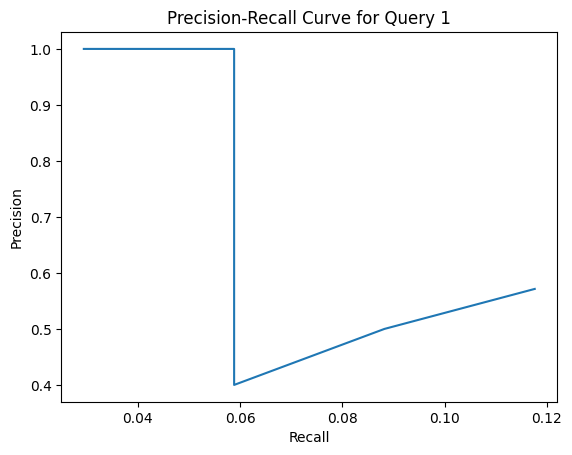

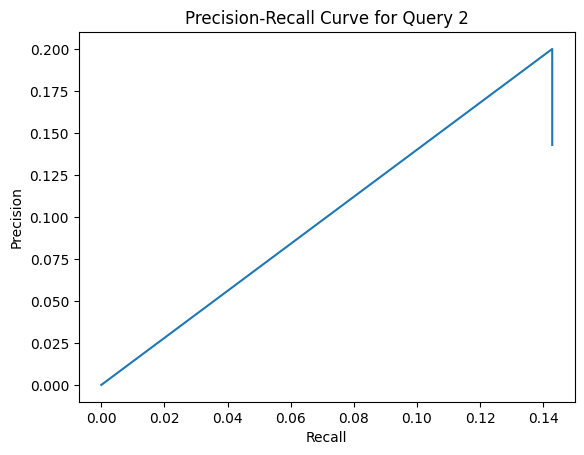

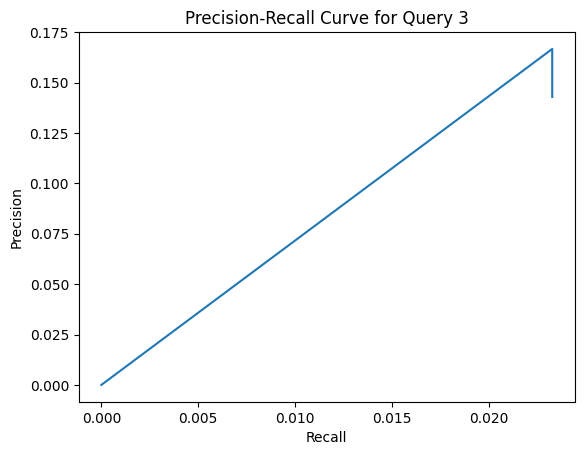

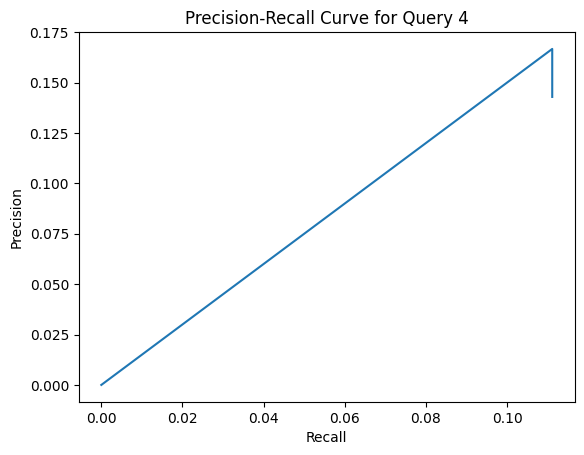

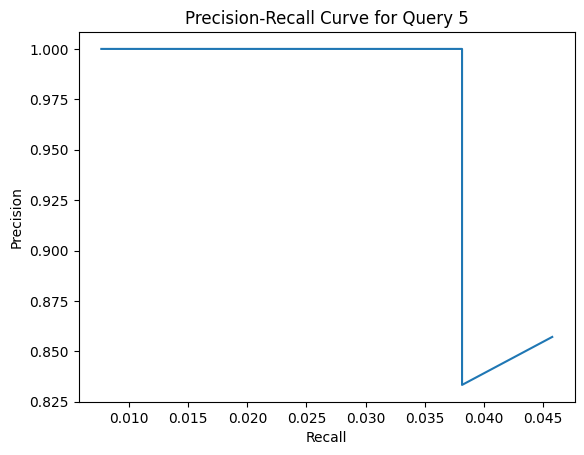

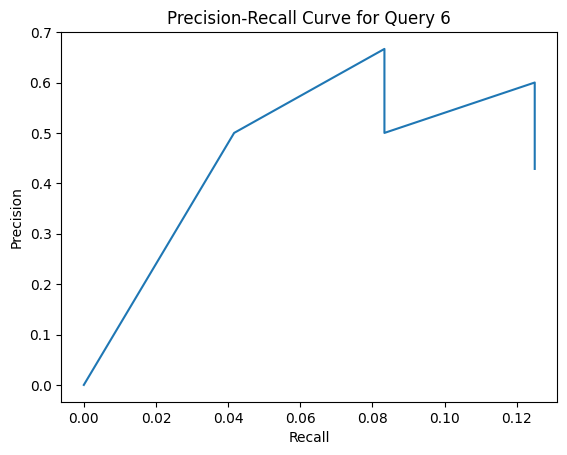

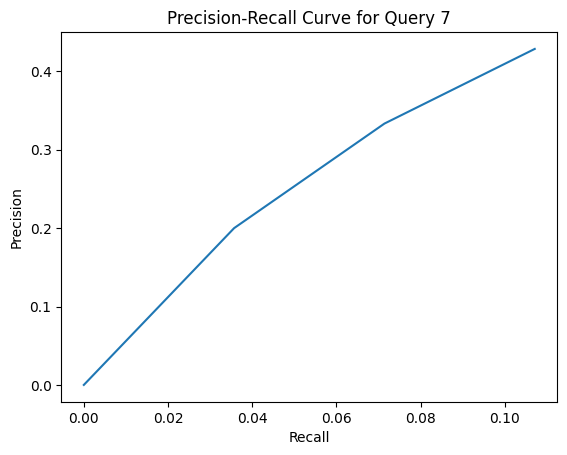

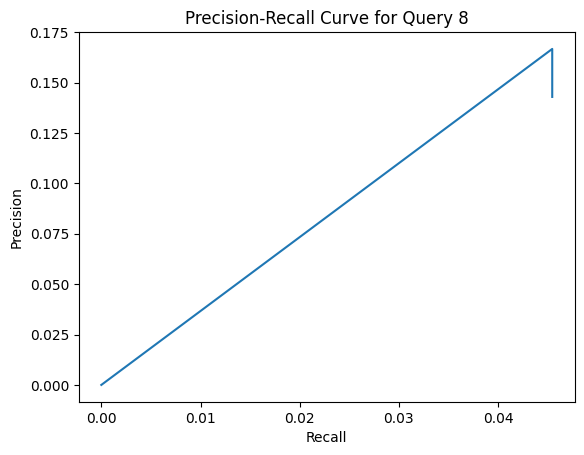

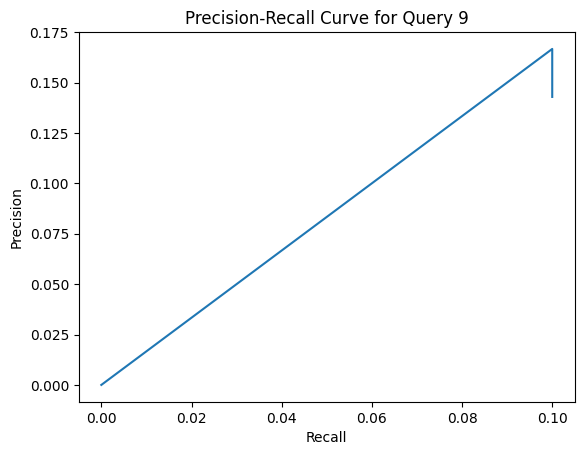

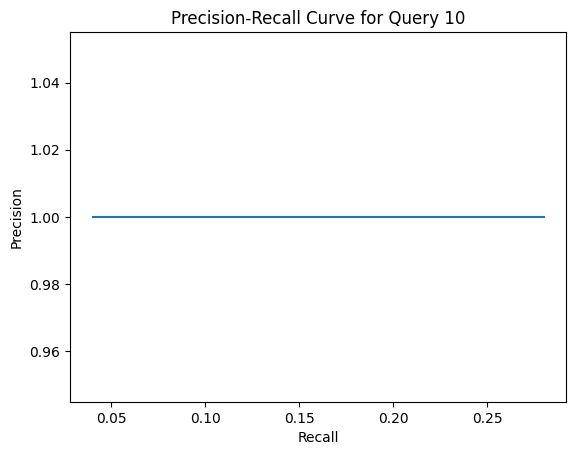

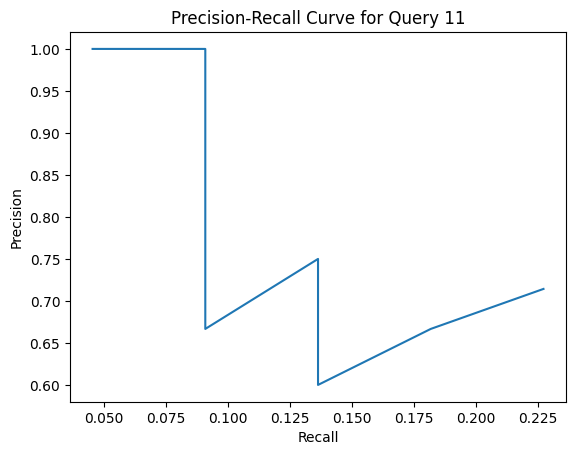

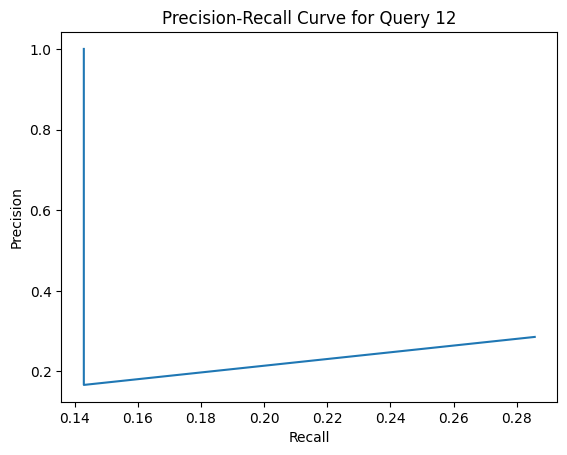

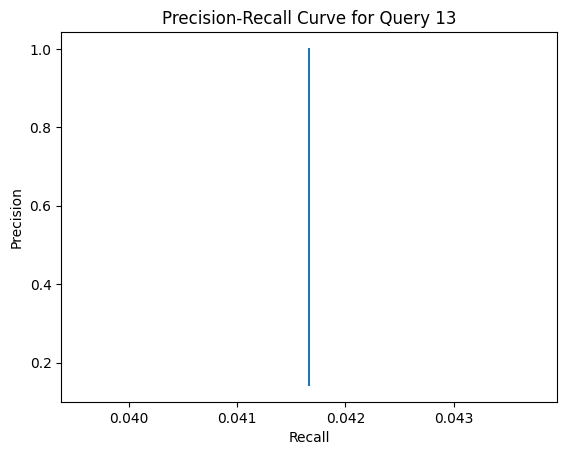

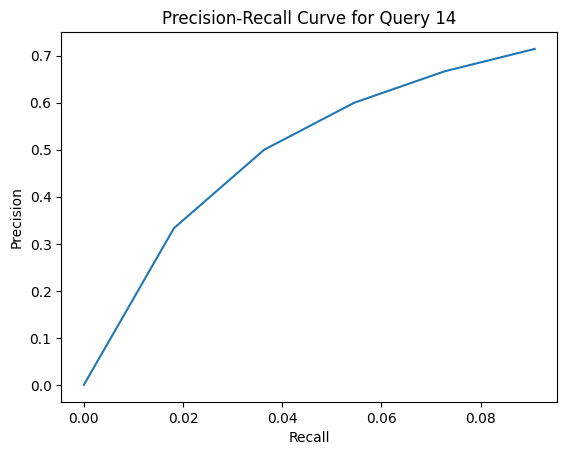

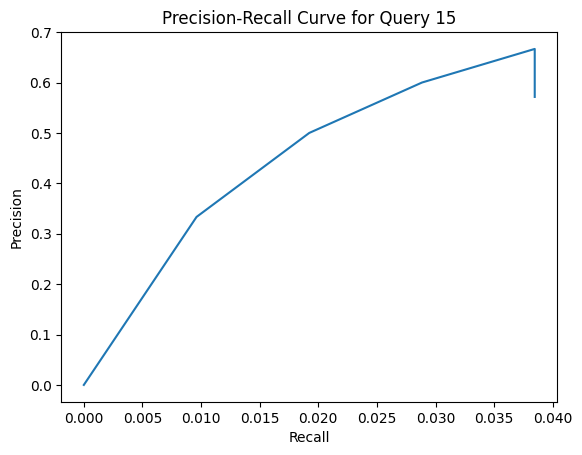

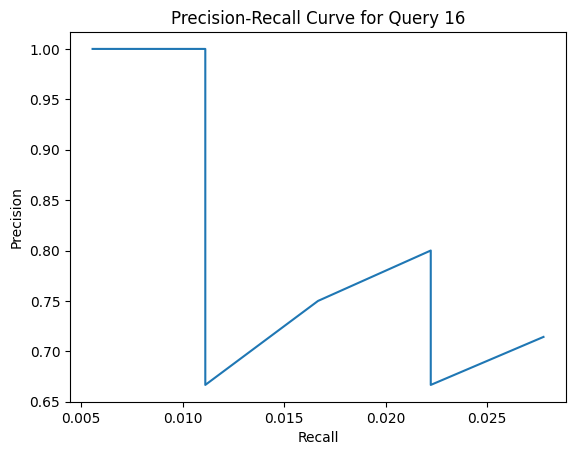

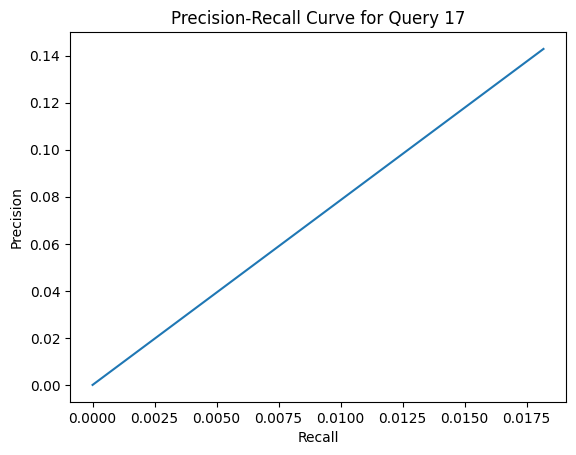

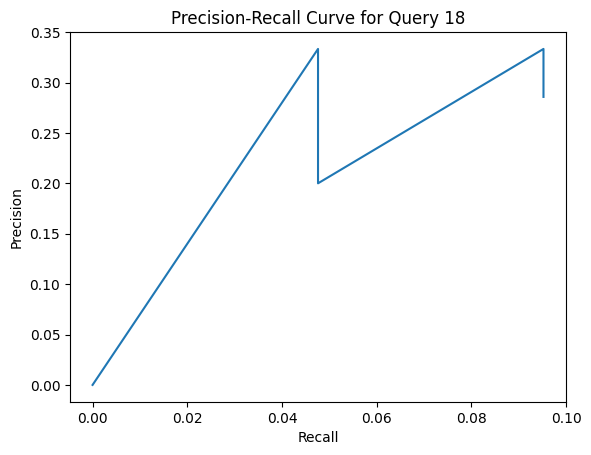

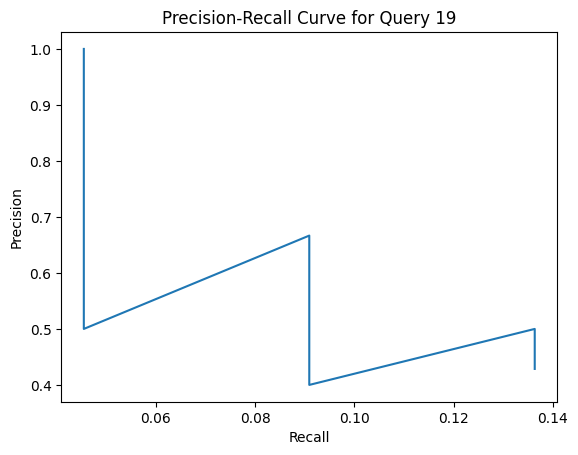

In [47]:
import matplotlib.pyplot as plt

# result_docs is an array with vector space most relevant docs for each query and relevant is an array with the true relevant
for i in range(len(result_docs)):
    retrieved_docs = set(result_docs[i])
    relevant_docs = set(relevant[i])

    # Initialize variables for precision, recall, and true positives
    precision_values = []
    recall_values = []
    true_positives = 0

    # Iterate over retrieved documents
    for j, doc in enumerate(result_docs[i]):
        if doc in relevant_docs:
            true_positives += 1

        # Calculate precision and recall at this point
        precision = true_positives /(j+1)
        recall = true_positives / len(relevant_docs) 

        precision_values.append(precision)
        recall_values.append(recall)

    # Plot the precision-recall curve for each query in a separate figure
    plt.figure()
    plt.plot(recall_values, precision_values)
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title(f'Precision-Recall Curve for Query {i + 1}')
    plt.show()


In [48]:

print(result_docs[9])
print(relevant[9])

[413, 1239, 1215, 126, 581, 676, 1218]
[30, 126, 157, 170, 296, 301, 322, 370, 413, 443, 581, 676, 715, 722, 728, 758, 782, 835, 878, 941, 1115, 1215, 1218, 1234, 1239]
